In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

# premier graphique

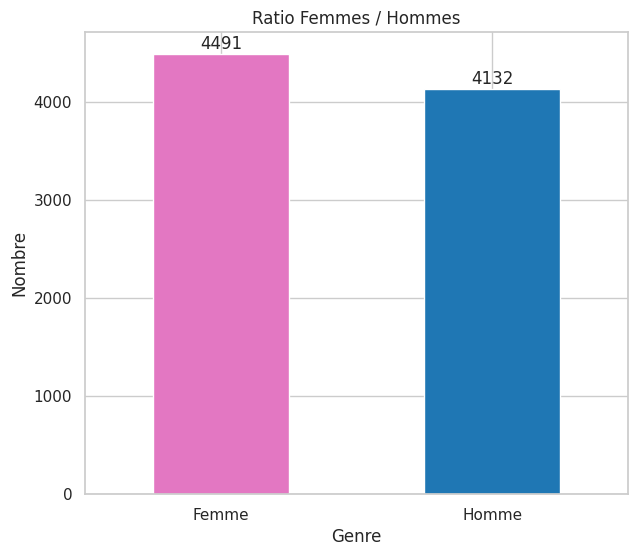

In [85]:
gender_counts = customers['sex'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender_counts.plot(kind='bar', rot=0, color=["tab:pink", "tab:blue"])
ax.set_title("Ratio Femmes / Hommes", y=1)
ax.set_xlabel('Genre')
ax.set_ylabel('Nombre')
ax.set_xticklabels(('Femme', 'Homme'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

<Figure size 1500x600 with 0 Axes>

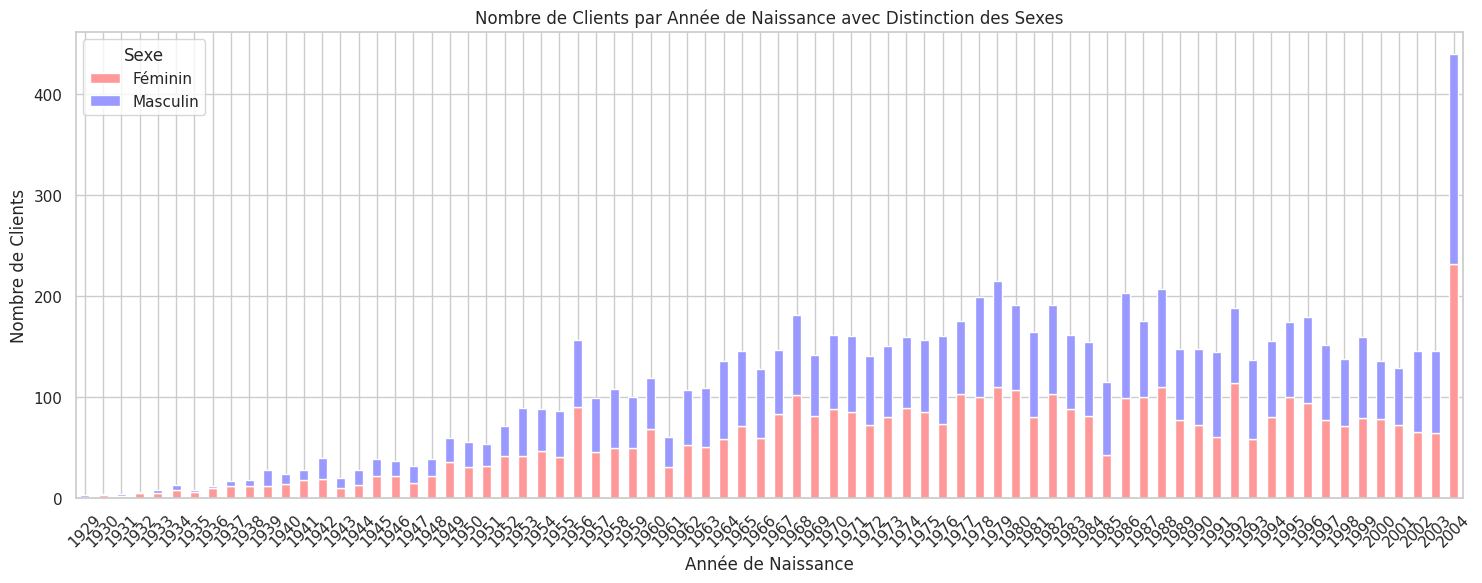

In [61]:
customers_by_sex_birth = customers.groupby(['sex', 'birth']).size().reset_index(name='count')
pivot_customers = customers_by_sex_birth.pivot(index='birth', columns='sex', values='count').fillna(0)
pivot_customers['Total'] = pivot_customers.sum(axis=1)
pivot_customers_sorted = pivot_customers.sort_values(by='Total')
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
pivot_customers[['f', 'm']].plot(kind='bar', stacked=True, color=['#ff9999', '#9999ff'], figsize=(15, 6))
plt.title('Nombre de Clients par Année de Naissance avec Distinction des Sexes')
plt.xlabel('Année de Naissance')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)
plt.legend(title='Sexe', labels=['Féminin', 'Masculin'])
plt.tight_layout()
plt.show()

In [62]:
current_year = pd.Timestamp('now').year
customers['age'] = current_year - customers['birth']
merged_data = transactions_clean.merge(customers, on='client_id')
merged_data = merged_data.merge(products, on='id_prod')
clients_agg = merged_data.groupby(['client_id', 'sex', 'age']).agg(
    frequency=('session_id', pd.Series.nunique),  
    total_revenue=('price', 'sum') 
).reset_index()
clients_agg['average_basket'] = clients_agg['total_revenue'] / clients_agg['frequency']
categ_revenue = merged_data.pivot_table(
    index='client_id', 
    columns='categ', 
    values='price', 
    aggfunc='sum', 
    fill_value=0
)
final_table = clients_agg.join(categ_revenue, on='client_id')
final_table

,client_id,sex,age,frequency,total_revenue,average_basket,0,1,2
0,c_1,m,69,15,300.65,20.043333,174.20,71.58,54.87
1,c_10,m,68,16,586.18,36.636250,124.92,391.27,69.99
2,c_100,m,32,3,222.87,74.290000,31.38,52.96,138.53
3,c_1000,f,58,42,980.02,23.333810,169.85,810.17,0.00
4,c_1001,m,42,24,1102.45,45.935417,527.81,274.64,300.00
...,...,...,...,...,...,...,...,...,...
8595,c_995,m,69,5,119.08,23.816000,55.34,63.74,0.00
8596,c_996,f,54,36,739.60,20.544444,204.70,534.90,0.00
8597,c_997,f,30,10,572.89,57.289000,84.86,158.92,329.11
8598,c_998,m,23,13,1527.69,117.514615,88.17,108.06,1331.46


# Product nettoyé

In [63]:
product_clean = products[products["price"] >= 0]
print(product_clean)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]


# Transactions nettoyé

In [64]:
transactions_clean = transactions[~transactions["date"].str.startswith('test')]
print(transactions_clean)

       id_prod                        date session_id client_id
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1        2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2        1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3       0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4       0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242
...        ...                         ...        ...       ...
337011   1_671  2021-05-28 12:35:46.214839    s_40720    c_3454
337012   0_759  2021-06-19 00:19:23.917703    s_50568    c_6268
337013  0_1256  2021-03-16 17:31:59.442007     s_7219    c_4137
337014   2_227  2021-10-30 16:50:15.997750   s_112349       c_5
337015  0_1417  2021-06-26 14:38:19.732946    s_54117    c_6714

[336816 rows x 4 columns]


# Graphique

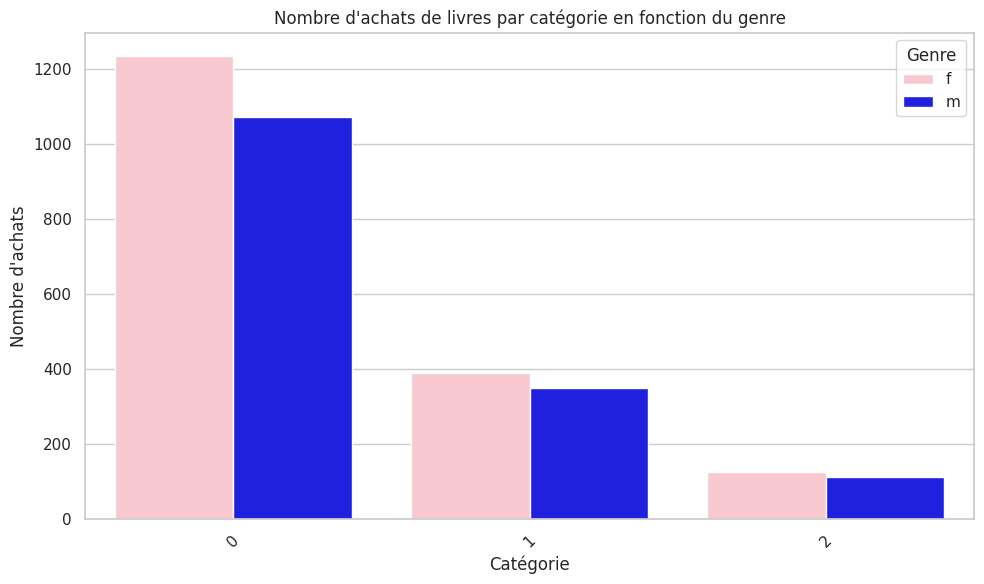

In [65]:
genre_deux= customers["sex"]
custom_palette = {'m': 'blue', 'f': 'pink'}
plt.figure(figsize=(10, 6))
sns.countplot(data=product_clean, x='categ', hue=genre_deux, palette=custom_palette)
plt.title('Nombre d\'achats de livres par catégorie en fonction du genre')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'achats')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()

# Produits non vendus

In [66]:
jointure_outer = pd.merge(transactions, products, on='id_prod', how='outer')
non_vendus = jointure_outer[jointure_outer['session_id'].isna()]
non_vendus_final =non_vendus["id_prod"].count()
print("Nombre de produits non vendus :", non_vendus_final)

Nombre de produits non vendus : 22


# Clients sans transactions

In [67]:
nombre_de_clients_sans_achat = 0
clients_sans_achat = set(customers['client_id']) - set(transactions['client_id'])
for client in clients_sans_achat:
    nombre_de_clients_sans_achat += 1
print("Nombre de clients n'ayant pas effectué d'achat :", nombre_de_clients_sans_achat)

Nombre de clients n'ayant pas effectué d'achat : 21


# En prenant la variable nettoyée

In [68]:
nombre_de_clients_sans_test = 0
clients_sans_test = set(transactions['date'].str.startswith('test'))
for client in clients_sans_test:
    nombre_de_clients_sans_test += 1
print("Nombre de clients n'ayant pas effectué d'achat :", nombre_de_clients_sans_test)

Nombre de clients n'ayant pas effectué d'achat : 2


In [80]:
nombre_de_clients_sans_achat_clean = 0
clients_sans_achat_clean = set(customers['client_id']) - set(transactions_clean['client_id'])

print("Noms des clients n'ayant pas effectué d'achat :")
for client_id in clients_sans_achat_clean:
    nombre_de_clients_sans_achat_clean += 1
    client_name = customers.loc[customers['client_id'] == client_id, 'client_id'].iloc[0]
    print(f"- {client_name}")

print("Nombre de clients n'ayant pas effectué d'achat :", nombre_de_clients_sans_achat_clean)

Noms des clients n'ayant pas effectué d'achat :
- c_1223
- c_4358
- c_4086
- c_587
- c_3526
- c_90
- c_4447
- c_8253
- c_862
- c_7584
- c_5245
- c_3017
- c_8381
- ct_0
- c_3443
- c_6735
- c_5223
- c_4406
- c_3789
- c_6930
- c_2706
- ct_1
- c_6862
Nombre de clients n'ayant pas effectué d'achat : 23


# Médiane des livres de toutes les catégories

In [70]:
median_prix_tous_livres = product_clean['price'].median()
print("Médiane des prix de tous les livres:", median_prix_tous_livres)

Médiane des prix de tous les livres: 13.075


# Changement du produit sans prix

In [71]:
nouveau_produit = pd.DataFrame([{'id_prod': '0_2245', 'price': median_prix_tous_livres, 'categ': pd.NA}])
products_df_modifie = pd.concat([products, nouveau_produit], ignore_index=True)
produit_0_2245_ajoute = products_df_modifie[products_df_modifie['id_prod'] == '0_2245']
produit_0_2245_ajoute
products_df_modifie.loc[products_df_modifie['id_prod'] == '0_2245', 'categ'] = 0
produit_0_2245_mis_a_jour = products_df_modifie[products_df_modifie['id_prod'] == '0_2245']
produit_0_2245_mis_a_jour

,id_prod,price,categ
3287,0_2245,13.075,0


# Corrélations

In [72]:
correlation_matrix = final_table[['age', 'frequency', 'total_revenue', 'average_basket', 0, 1, 2]].corr()
correlation_matrix

,age,frequency,total_revenue,average_basket,0,1,2
age,1.000000,0.034473,-0.039311,-0.635116,0.001871,0.071732,-0.118598
frequency,0.034473,1.000000,0.908031,-0.070662,0.903133,0.944583,0.282648
total_revenue,-0.039311,0.908031,1.000000,0.031288,0.763028,0.872090,0.625651
average_basket,-0.635116,-0.070662,0.031288,1.000000,-0.069433,-0.073368,0.166384
0,0.001871,0.903133,0.763028,-0.069433,1.000000,0.818031,0.002548
1,0.071732,0.944583,0.872090,-0.073368,0.818031,1.000000,0.259693
2,-0.118598,0.282648,0.625651,0.166384,0.002548,0.259693,1.000000
